## Задание 1
>*Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.*

In [69]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [70]:
# загрузим датасет в переменную boston
boston = load_boston()
print(type(boston))
# непонятно откуда, но мы узнали что загруженный набор данных - это словарь. Смотрим ключи этого словаря
boston.keys()


<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [71]:
# попробуем понять что это за словарь и какая в нем содержится информация
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
# ключ data содержит значения данных в выборке.
data = boston["data"]
# всего получается 506 строк - для каждого объекта недвижимости, и 13 признаков
data.shape

(506, 13)

In [73]:
# названия признаков - это значения ключа "feature_names"
feature_names = boston["feature_names"]
# что они означают - смотрим значение ключа DESCR
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [74]:
# ключ "target" содержит массив целевых значений, то есть цен на недвижимость
target = boston["target"]
target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [75]:
# создадим датафрейм из массива data. Названия колонок (признаков) возьмем из массива - feature_names
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [76]:
# создадим еще один датафрейм, в нем будут целевые значения. Колонку назовем - price
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [77]:
# проанализируем датасеты на незаполненные или пропущенные значения
print(X.info())
print()
print(y.info())
print()
print('Видим, что каждый признак в обеих датафреймах имеет по 506 значений. Значит незаполненных или пропущенных данных нет. Хорошо!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
None

Видим, что кажды

In [78]:
# чтобы разбить нашу выборку на тренировочную и тестовую (валидационную) загрузим функции "train_test_split"
from sklearn.model_selection import train_test_split

In [79]:
# разобьем наши датафреймы на тренировочные и тестовые. Если параметр test_size от 0 до 1, то он воспринимается как доля. В противном случае как количество 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
# загружаем модель линейной регрессии
from sklearn.linear_model import LinearRegression

In [81]:
# создаем экземпляр модели линейной  регрессии lr 
lr = LinearRegression()

In [82]:
# обучим нашу модель с помощью метода fit
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# Теперь, когда модель обучена, мы можем получить предсказанные значения на объектах X_test с помощью метода .predict:
y_pred = lr.predict(X_test)

In [84]:
# Создадим таблицу DataFrame чтобы сопоставить реальные значения с предсказанными. 
# Поскольку массив y_pred является двумерным, переведём его в одномерный, используя метод .flatten.
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [85]:
from sklearn.metrics import r2_score

In [86]:
R2 = r2_score(y_test, y_pred)
R2

0.7112260057484974

## Задание 2
>*Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.*

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
from sklearn.metrics import r2_score

In [89]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:,0])
y_pred = model.predict(X_test)
R2 = r2_score(y_test, y_pred)
R2


0.8749965273218174

Для модели LinearRegression мы получили коэфициент R2 = 0,71. Для модели RandomForestRegressor мы получили коэфициент R2 = 0,875, что **значительно** лучше

## Задание 3
>*Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.*

In [90]:
# посмотрим на аттрибут feature_importance_ . Похоже, что этот аттрибут содержит информацию
# об индексе важности каждого признака, то есть насколько каждый признак в итоге влияет на оценку для конкретного состояния обучения
model.feature_importances_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

In [91]:
# я так понял, что нужно найти сумму всех feature_importances_. Предположительно, она должна быть равна 1.
s_f = model.feature_importances_.sum()
print(f'Сумма всех показателей важности = {s_f}')

Сумма всех показателей важности = 0.9999999999999999


In [92]:
# создадим датафрейм содержащий признаки и индекс их влияния (важности)
important_features = pd.DataFrame({
    "feature": boston["feature_names"],
    "importance_ind": model.feature_importances_,
})
important_features

,feature,importance_ind
0,CRIM,0.032117
1,ZN,0.001550
2,INDUS,0.007094
3,CHAS,0.001149
4,NOX,0.014368
5,RM,0.402705
6,AGE,0.014245
7,DIS,0.064033
8,RAD,0.004968
9,TAX,0.011692


In [93]:
# отсортируем датафрейм по индексу влияния от большего к меньшему, и возьмем первые два значения
# это будут два наиболее важных признака
important_features.sort_values(by="importance_ind", inplace=True, ascending=False)
print('Два, наиболее влиятельных (важных) признака: ')
important_features[:2]

Два, наиболее влиятельных (важных) признака: 


,feature,importance_ind
12,LSTAT,0.415679
5,RM,0.402705


## Задание 4
>*В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.
Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.
Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.*

In [94]:
# загружаем необходимые модули
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [95]:
# загружаем датасет creditcard.csv
url = "/content/drive/MyDrive/Образование/Факультет ИИ/Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn/creditcard.csv"
# url = "creditcard.csv"
df = pd.read_csv(url)


In [96]:
# Признак Class определяет тип операции: 0 - обычная, 1 - мошенчиеская. Параметр normalize=True - вычисляет относительную гистограмму.
# В данном случае, если normalize=False - будут показаны количества операций каждого типа, если True - доля операций 
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Мы получили, что доля обычных операций практически равна 100%, и очень малая часть, около 0,1% операции признаны мошенническими. То есть выборка явно несбалансирована

In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

В нашем наборе данных все столбцы имеют числовой тип данных и пропусков не наблюдается.
Уменьшим занимаемый датасетом объем оперативной памяти.

In [98]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [99]:
# уменьшаем размер занимаемой датасетом оперативной памяти
df = reduce_mem_usage(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 32.87 MB
Decreased by 51.2%


In [100]:
# настраиваем кол-во отображаемых столбцов
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.990000,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686132,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.799999,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.199997,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.680000,0


In [102]:
# создаем датафрейм X исключив столбец Class (он последний)
X = df.iloc[:, :-1]
# Каждый отдельный столбец датафрейма представляет собой объект Series. 
y = df.Class
# Разбиваем наш набор данных на тренировочный и тестовый
# что значит параметр stratify=y?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
print(f'Форма X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}')

Форма X_train = (199364, 30), X_test = (85443, 30), y_train = (199364,), y_test = (85443,)


In [107]:
# Задаем параметры для поиска наилучших значений. (Почему мы берем такие?!)
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)



In [108]:
# обучаем модель
clf.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [109]:
# смотрим, какие параметры оказались для модели наилучшими
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [123]:
# Оцениваем вероятности для классов с помощью метода predict_proba на тестовых данных
y_pred_proba = clf.predict_proba(X_test)
# Оцениваем вероятности для классов с помощью метода predict_proba на тренировочных данных
# Они понадобятся для сравнения и потом построим по ним графики для наглядности
y_pred_train_proba = clf.predict_proba(X_train)
# в данном случае очень неудобно смотреть на цифры в научном формате, убираем его
np.set_printoptions(suppress=True)
print(y_pred_proba)

[[0.99907083 0.00092917]
 [0.99970479 0.00029521]
 [0.99971785 0.00028215]
 ...
 [0.99971785 0.00028215]
 [0.9993178  0.0006822 ]
 [0.98753902 0.01246098]]


In [124]:
# оставляем в нашем массиве только вероятности для класса 1 (мошеннические операции)
# они нам собственно и нужны
y_pred_proba = y_pred_proba[:, 1]
# то же самое для тренировочных данных
y_pred_train_proba = y_pred_train_proba[:, 1]
print(y_pred_proba)

[0.00092917 0.00029521 0.00028215 ... 0.00028215 0.0006822  0.01246098]


In [136]:
# импортируем нужную нам метрику, в данном случае - roc_auc_score
from sklearn.metrics import roc_auc_score
# вычисляем метрику AUC на тренировочных данных
AUC_train = roc_auc_score(y_train, y_pred_train_proba)
# вычисляем метрику AUC на тестовых данных
AUC_test = roc_auc_score(y_test, y_pred_proba)
print(f'На тренировчных данных расчитанный AUC train = {AUC_train}')
print(f'На тестовых данных расчитанный AUC = {AUC_test}')
print(f'На тренировочных данных значение AUC больше чем на тестовых? - {"Да!" if AUC_train > AUC_test else "Нет"}')

На тренировчных данных расчитанный AUC train = 0.9703527882554751
На тестовых данных расчитанный AUC = 0.9462664156037156
На тренировочных данных значение AUC больше чем на тестовых? - Да!


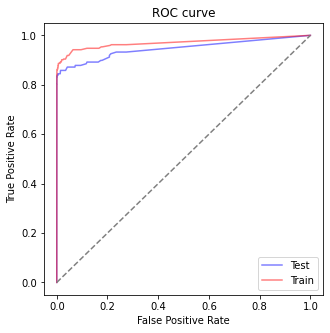

In [144]:
# попробуем визуализировать результат
# построим графики roc кривых для тренировочных и тестовых данных
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_pred_train_proba, pos_label=1)

plt.rcParams['figure.figsize'] = 5, 5

plt.plot(fpr, tpr, color='blue', alpha = 0.5, label = 'Test')
plt.plot(fpr_train, tpr_train, color='red', alpha = 0.5, label = 'Train')
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 'best')
plt.show()
